Let

    G = exp(g' + chi) = exp(g), i.e.
    g = g' + chi, 
    
where

    dg = kappa * (theta - g') * dt + sigma * dW
    [...]
    dg = kappa * (theta + chi + dchi/dt / kappa - g) * dt + sigma * dW
    dg = kappa * (theta_tilde - g) * dt + sigma * dW, 
    
with 

    theta_tilde = theta + chi + dchi/dt / kappa


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


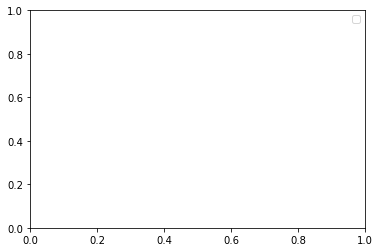

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


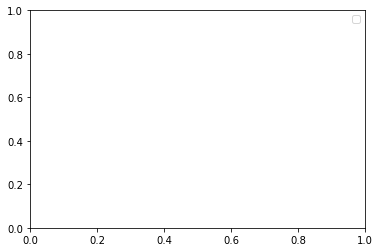

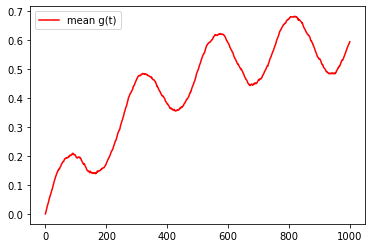

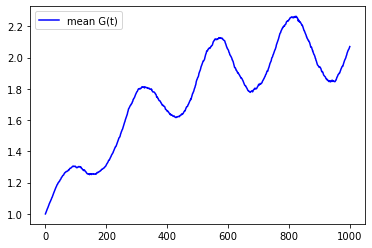

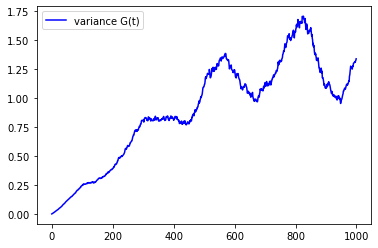

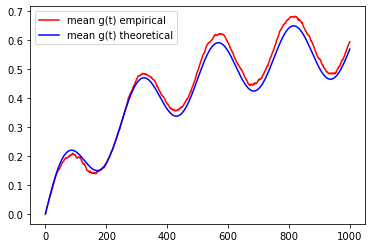

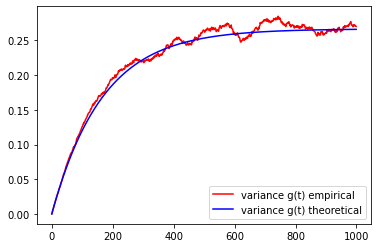

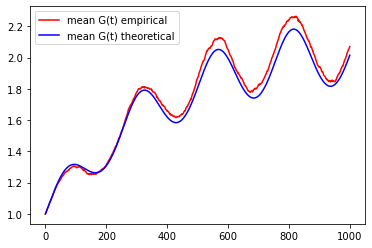

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

T = 10.0
nb_simu = 1000
nb_time = 1000

dt = T / float(nb_time)
dt_sqrt = math.sqrt(dt)
dW_t = np.random.normal(size=(nb_simu,nb_time-1)) * dt_sqrt

g0 = .0
G0 = math.exp(g0)
sigma = .4
kappa = .3
theta = .6

f = 1.0 / 4.0
_chi = lambda x : .1 * math.sin(2.0 / f * math.pi * x / T)
gPrime0 = g0 - _chi(.0)

chi = np.array([_chi(iTime * dt) for iTime in range(0, nb_time+1)])
dchidt = np.array([(chi[iTime + 1] - chi[iTime]) / dt for iTime in range(0, nb_time)])

G = np.zeros((nb_simu,nb_time))
g = np.zeros((nb_simu,nb_time))

for iSimu in range(0, nb_simu):
    g[iSimu,0] = g0
    G[iSimu,0] = G0
    
    for jTime in range(1, nb_time):
        g[iSimu,jTime] = g[iSimu,jTime-1] + kappa * (theta + chi[jTime] + dchidt[jTime] / kappa - g[iSimu,jTime-1]) * dt + sigma * dW_t[iSimu,jTime-1]
        G[iSimu,jTime] = math.exp(g[iSimu,jTime])

for iSimu in range(0, 10):
    plt.legend()

plt.show()

for iSimu in range(0, 10):
    plt.legend()
    
plt.show()

mean_g_empirical = np.zeros((nb_time))
mean_G_empirical = np.zeros((nb_time))

for iTime in range(0, nb_time):
    mean_g_empirical[iTime] = np.mean(g[:,iTime])
    mean_G_empirical[iTime] = np.mean(G[:,iTime])
    
plt.plot(mean_g_empirical, color='red', label='mean g(t)')
plt.legend()
plt.show()

plt.plot(mean_G_empirical, color='blue', label='mean G(t)')
plt.legend()
plt.show()

var_g_empirical = np.zeros((nb_time))
var_G_empirical = np.zeros((nb_time))

for iTime in range(0, nb_time):
    var_g_empirical[iTime] = np.var(g[:,iTime])
    var_G_empirical[iTime] = np.var(G[:,iTime])

plt.plot(var_G_empirical, color='blue', label='variance G(t)')
plt.legend()
plt.show()

def _mean_g_theoretical(t):
    return math.exp(- kappa * t) * gPrime0 + theta * (1.0 - math.exp(- kappa * t)) + _chi(t)

def _var_g_theoretical(t):
    return sigma * sigma / (2.0 * kappa) * (1.0 - math.exp(- 2.0 * kappa * t))

plt.plot(mean_g_empirical, color='red', label='mean g(t) empirical')
plt.plot([_mean_g_theoretical(iTime * dt) for iTime in range(0, nb_time)], color='blue', label='mean g(t) theoretical')
plt.legend()
plt.show()

plt.plot(var_g_empirical, color='red', label='variance g(t) empirical')
plt.plot([_var_g_theoretical(iTime * dt) for iTime in range(0, nb_time)], color='blue', label='variance g(t) theoretical')
plt.legend()
plt.show()

def _mean_G_theoretical(t):
    return math.exp(_mean_g_theoretical(t) + .5 * _var_g_theoretical(t))

def _var_G_theoretical(t):
    return math.exp(2.0 * _mean_G_theoretical(t) + _var_G_theoretical(t)) * (math.exp(_var_G_theoretical(t)) - 1.0)

plt.plot(mean_G_empirical, color='red', label='mean G(t) empirical')
plt.plot([_mean_G_theoretical(iTime * dt) for iTime in range(0, nb_time)], color='blue', label='mean G(t) theoretical')
plt.legend()
plt.show()

plt.plot(var_G_empirical, color='red', label='variance G(t) empirical')
plt.plot([_var_G_theoretical(iTime * dt) for iTime in range(0, nb_time)], color='blue', label='variance G(t) theoretical')
plt.legend()
plt.show()
